In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
asthma = pd.read_csv('observed_asthma.csv')
asthma.head()

,Unnamed: 0,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,...,asthma_deaths_per_100k,asthma_lb,asthma_ub,current_smoking_pct,current_smoking_lb,current_smoking_ub,daily_smoker_pct,daily_smoker_lb,daily_smoker_ub,observed
0,0,1996,10001,Delaware,Kent,0.000000,0.00000,0.052134,0.0,0.000000,...,2.016585,1.682840,2.418712,27.85,25.41,30.42,24.97,22.72,27.48,1
1,1,1996,10003,Delaware,New Castle,0.777178,19.04093,0.045973,0.0,0.349306,...,1.738850,1.518789,2.009553,25.38,23.46,27.31,21.43,19.76,23.18,1
2,2,1996,10005,Delaware,Sussex,0.000000,0.00000,0.048738,0.0,0.000000,...,1.693894,1.426025,1.998171,28.77,26.22,31.37,25.79,23.31,28.02,1
3,3,1996,12003,Florida,Baker,0.000000,0.00000,0.040651,0.0,0.000000,...,1.995325,1.561440,2.510761,29.25,24.59,34.13,26.08,21.83,30.95,1
4,4,1996,12009,Florida,Brevard,0.000000,0.00000,0.038388,0.0,0.000000,...,1.334301,1.149089,1.550314,28.50,24.56,32.46,24.41,21.30,28.26,1


In [19]:
asthma = asthma.drop(columns=['Unnamed: 0'])
asthma.columns

Index(['year', 'fips', 'state_name', 'county_name',
       'arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',
       'arithmetic_standard_dev|Carbon monoxide',
       'arithmetic_standard_dev|Nitrogen dioxide (NO2)',
       'arithmetic_standard_dev|Ozone',
       'arithmetic_standard_dev|PM2.5 - Local Conditions',
       'fifty_percentile|Carbon monoxide',
       'fifty_percentile|Nitrogen dioxide (NO2)', 'fifty_percentile|Ozone',
       'fifty_percentile|PM2.5 - Local Conditions',
       'first_max_value|Carbon monoxide',
       'first_max_value|Nitrogen dioxide (NO2)', 'first_max_value|Ozone',
       'first_max_value|PM2.5 - Local Conditions',
       'fourth_max_value|Carbon monoxide',
       'fourth_max_value|Nitrogen dioxide (NO2)', 'fourth_max_value|Ozone',
       'fourth_max_value|PM2.5 - Local Conditions',
       'latitude|Nitrogen dioxide (NO2)', 'longitude|PM2.5 - Local

In [21]:
noAsthma = pd.read_csv('no_asthma.csv')
noAsthma = noAsthma.drop(columns=['Unnamed: 0'])
noAsthma.head()

,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,arithmetic_standard_dev|Nitrogen dioxide (NO2),...,seventy_five_percentile|Ozone,seventy_five_percentile|PM2.5 - Local Conditions,ten_percentile|Carbon monoxide,ten_percentile|Nitrogen dioxide (NO2),ten_percentile|Ozone,ten_percentile|PM2.5 - Local Conditions,third_max_value|Carbon monoxide,third_max_value|Nitrogen dioxide (NO2),third_max_value|Ozone,third_max_value|PM2.5 - Local Conditions
0,1980,1001,Alabama,Autauga,0.000000,0.000000,0.054327,0.0,0.000000,0.000000,...,0.066,0.0,0.0,0.0,0.035,0.0,0.0,0.00,0.093,0.0
1,1980,1083,Alabama,Limestone,0.000000,6.369048,0.000000,0.0,0.000000,3.060250,...,0.000,0.0,0.0,3.5,0.000,0.0,0.0,12.50,0.000,0.0
2,1980,1099,Alabama,Monroe,0.000000,0.000000,0.049797,0.0,0.000000,0.000000,...,0.061,0.0,0.0,0.0,0.028,0.0,0.0,0.00,0.105,0.0
3,1980,2185,Alaska,North Slope,0.190856,2.759253,0.000000,0.0,0.102149,5.192010,...,0.000,0.0,0.1,0.0,0.000,0.0,0.6,34.25,0.000,0.0
4,1980,2261,Alaska,Valdez-Cordova,0.000000,4.461930,0.023752,0.0,0.000000,4.481464,...,0.045,0.0,0.0,0.5,0.025,0.0,0.0,30.50,0.053,0.0


In [45]:
X = asthma[['arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
y = asthma[['asthma_ub']].values.reshape(-1, 1)
print(X.shape, y.shape)

(12822, 4) (12822, 1)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [48]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [49]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

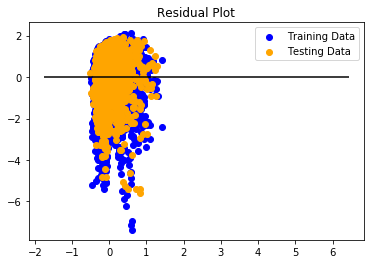

In [50]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8740733051638825, R2: 0.06531365910791964


In [55]:
 # LASSO model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8750959947001729, R2: 0.06422005067153724


In [56]:
# Ridge model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8740733071609664, R2: 0.06531365697234681


In [57]:
# ElasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8744915991204159, R2: 0.06486635835483678


In [51]:
X_predict = noAsthma[['arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
noAsthma[['asthma_deaths_per_100k']] = pd.DataFrame(model.predict(X_predict))

In [52]:
noAsthma['asthma_deaths_per_100k']

0      -0.011269
1       0.313298
2      -0.010329
3       0.161343
4       0.214559
5      -0.010641
6       0.485321
7       0.637282
8       0.440213
9       0.195690
10      0.407463
11      0.221211
12      1.336943
13      0.199062
14      0.242086
15      0.169425
16      2.051318
17      0.138964
18      0.532736
19      0.410860
20      0.662787
21     -0.010559
22     -0.011195
23      0.111107
24     -0.010521
25      1.013329
26      1.234240
27      0.421092
28      0.434555
29     -0.007537
          ...   
3598   -0.213567
3599   -0.117429
3600   -0.010169
3601   -0.731040
3602    0.049534
3603   -0.397635
3604   -0.229124
3605   -0.009007
3606   -0.008389
3607    0.215983
3608   -0.660677
3609   -0.334451
3610   -0.276957
3611    0.156191
3612    0.197099
3613   -0.009601
3614   -0.614821
3615   -1.360233
3616    0.480682
3617   -0.004121
3618   -0.761982
3619   -0.596763
3620   -0.589072
3621   -0.241055
3622   -0.001291
3623   -0.773067
3624    0.074252
3625   -0.4756

In [42]:
noAsthma.to_csv('predicted_asthma_multi_linear_scaled.csv')